<div dir="rtl">
    سوال 4.2
    <br>
    تمرین سری 5
    <br>
    درس شبیه سازی رایانه ای در فیزیک
    <br>
    علیرضا رضایی
    <br>
    97100762
</div>

In [5]:
import numpy as np
from modules import Modules
import matplotlib.pyplot as plt
from seaborn import set as sset; sset()

In [6]:
# constants ---------------------------------

class Constants:
    def __init__(self, taw: float, l: float):
        # taw is how long each time step lasts
        self.taw = taw
        
        # l is length of each walk step
        self.l = l
        
constants = Constants(taw=1, l=1)

In [7]:
# calculated functions ----------------------

# these are the fuctions that calculated mathematicaly in the book
# t (an integer) is the time that random walker walks and p (a float number) is probability to go to the right side

expectation_value = lambda t, p: constants.l*(2*p-1)*t/constants.taw
std = lambda t, p: 4*(constants.l**2)*p*(1-p)*t/constants.taw

In [8]:
# simulator function ------------------------

def random_walk(t: int, p: float, number_of_tests: int) -> np.ndarray:
    '''
        Explanation:
            find x after t seconds of random walk with probability of p to go to the right side
        
        Return:
            an np.array of size number_of_tests that contains x values after t seconds of random walk
    '''
    
    # use // instead of / to do integer deviding
    # for example 2/1 returns 2.0 but 2//1 returns 2
    n_walk_step = t//constants.taw
    
    # np.random.bionomial returns an np.array that each element of that is the number of steps
    # that random_walker went to the right in its n_walk steps with probability of p
    # and the array size is the number of tests that we did.
    
    steps_went_right = np.random.binomial(n_walk_step, p, number_of_tests)
    steps_went_left = n_walk_step - steps_went_right
    
    xt = (steps_went_right - steps_went_left) * constants.l
            
    return xt

In [5]:
# calculations -------------------------------

def calculate(t: int, p_list: list, number_of_tests: int) -> None:
    '''calculate what we want in time t'''

    for p in p_list:
        xt = random_walk(t, p, number_of_tests)
        
        simulated_expectation_value = xt.mean()
        simulated_std = (xt**2).mean() - (xt.mean())**2

        calculated_expectation_value = expectation_value(t, p)
        calculated_std = std(t, p)

        # percentage of relative error
        expectation_value_error = (calculated_expectation_value - simulated_expectation_value) / simulated_expectation_value * 100
        std_error = (calculated_std - simulated_std) / simulated_std * 100
        
        
        print(f"for p={p}:")
        Modules.boxed_print([
                f"calculated expectation value is: {calculated_expectation_value}",
                f"simulated expectation value is: {simulated_expectation_value}",
                f"Error is: {round(expectation_value_error, 2)} %",
                f"calculated std is: {calculated_std}",
                f"simulated std is: {simulated_std}",
                f"Error is: {round(std_error, 2)} %"
        ])

In [10]:
# do the job -------------------------------------

print("*** by error we mean percentage of relative error *** \n")

calculate(t=10000, p_list=np.linspace(0.1, 0.9, 9), number_of_tests=100000)

*** by error we mean percentage of relative error *** 

for p=0.1:


for p=0.2:


for p=0.30000000000000004:


for p=0.4:


for p=0.5:


for p=0.6:


for p=0.7000000000000001:


for p=0.8:


for p=0.9:


In [33]:
# more calculations -------------------------------

def more_calculations(t_max: list, p_list: list, number_of_tests: int) -> None:
    '''calculate what we want in some times t'''

    for p in p_list:
        T = []
        
        simulated_expectation_value  = []
        simulated_std                = []
        calculated_expectation_value = []
        calculated_std               = []
        
        for t in range(t_max):
            if t %100 == 0:
                T.append(t)
                
                xt = random_walk(t, p, number_of_tests)

                simulated_expectation_value  .append(xt.mean())
                simulated_std                .append((xt**2).mean() - (xt.mean())**2)
                
                calculated_expectation_value .append(expectation_value(t, p))
                calculated_std               .append(std(t, p))
                
            
        plt.figure()
        plt.plot(T, simulated_expectation_value, marker="o", label="simulated")
        plt.plot(T, calculated_expectation_value, marker="o", label="calculated", alpha=0.5)
        plt.title(f"p = {p}")
        plt.xlabel("t")
        plt.ylabel("<x(t)>")
        plt.legend()
        
        plt.figure()
        plt.plot(T, simulated_std, marker="o", label="simulated")
        plt.plot(T, calculated_std, marker="o", label="calculated", alpha=0.5)
        plt.title(f"p = {p}")
        plt.xlabel("t")
        plt.ylabel(r"$\sigma^2$")
        plt.legend()

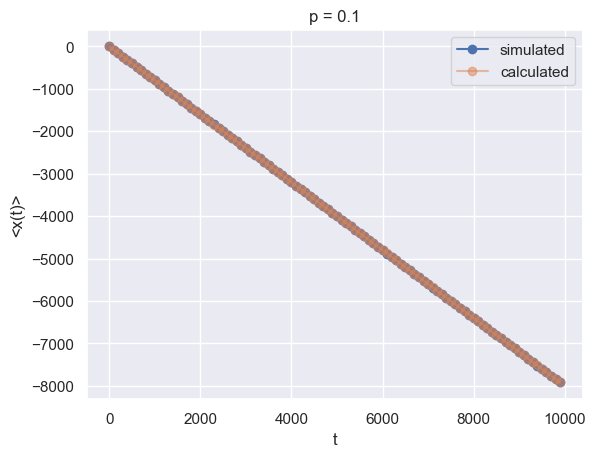

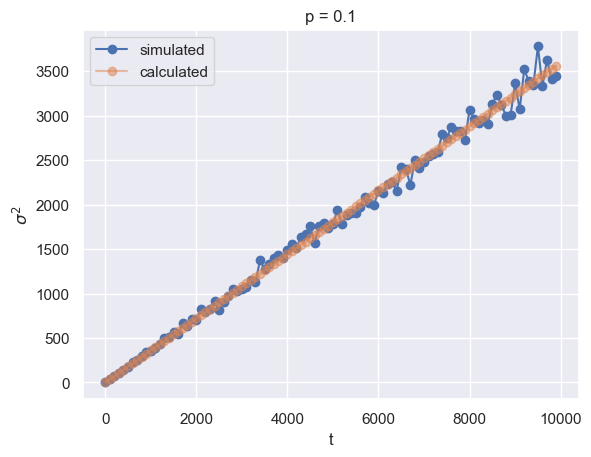

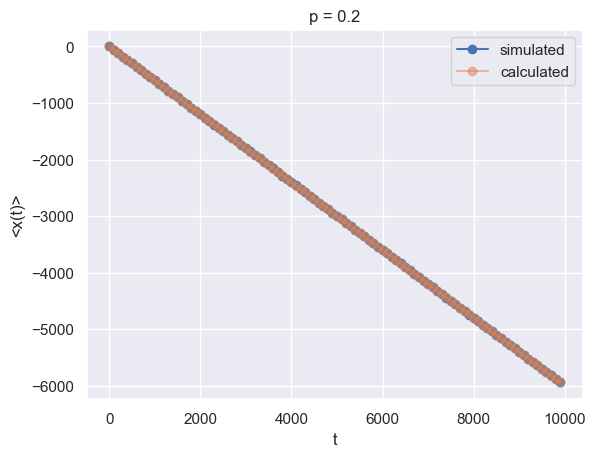

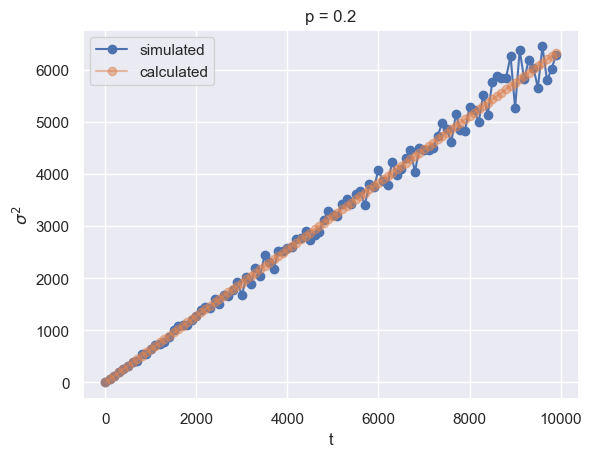

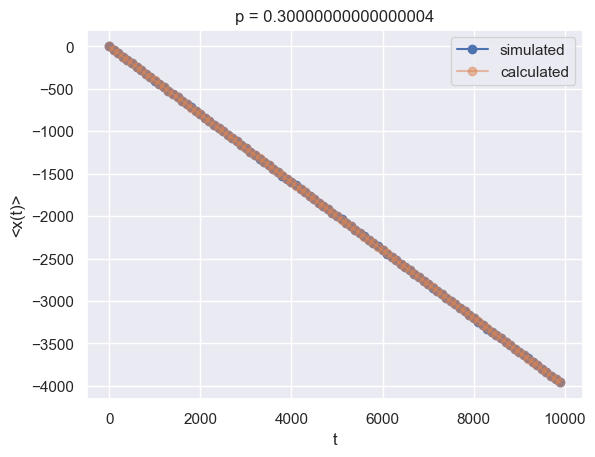

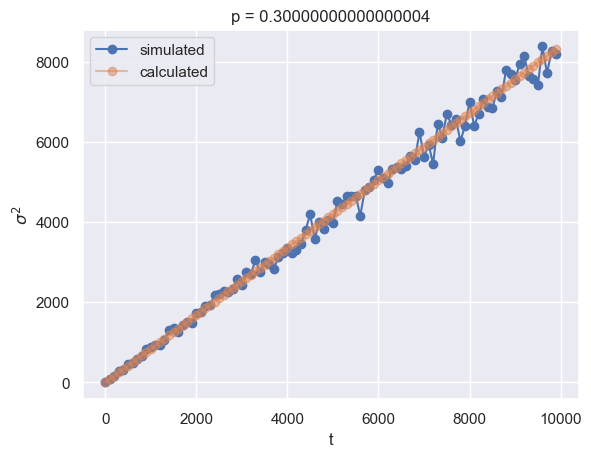

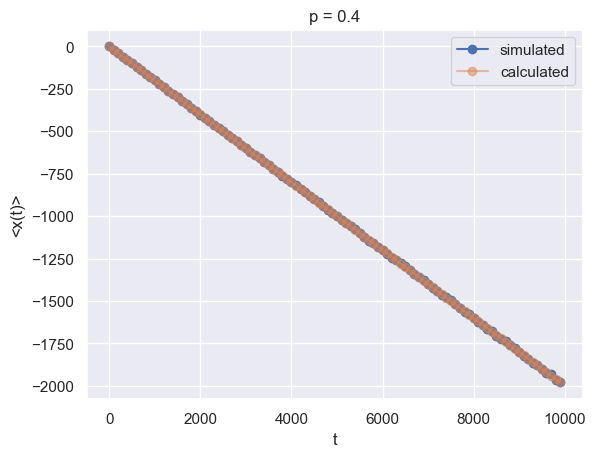

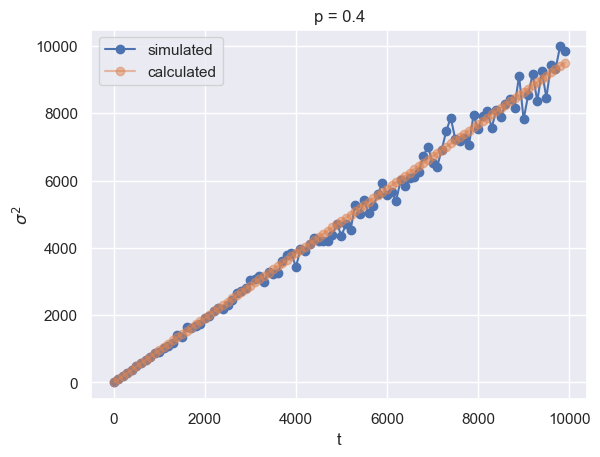

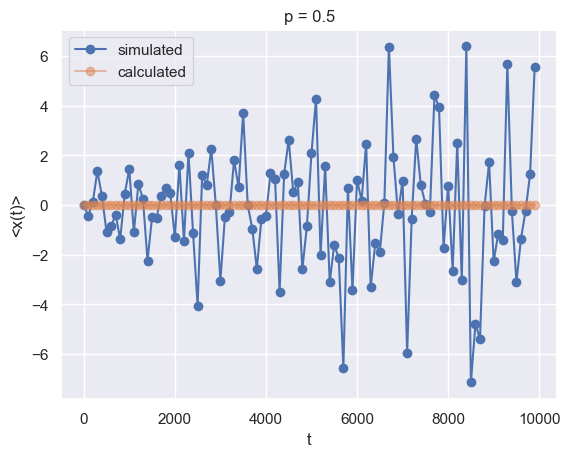

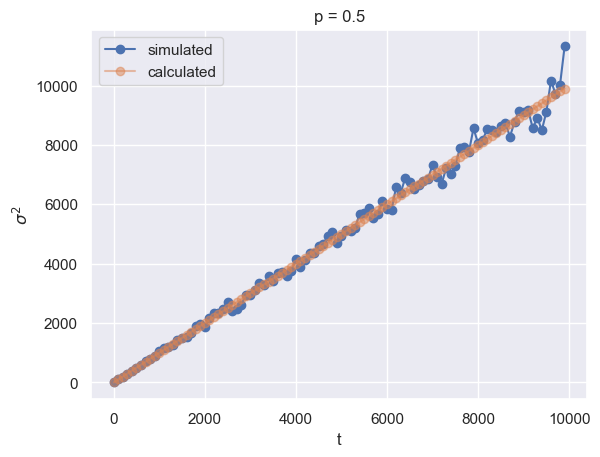

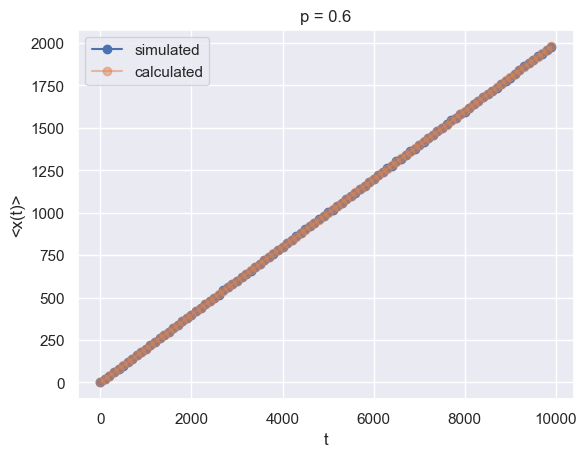

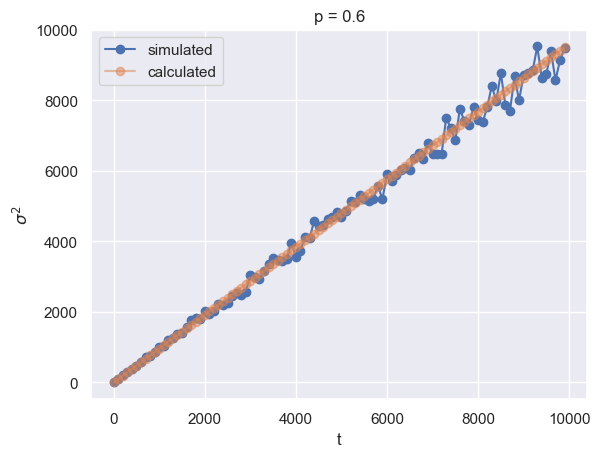

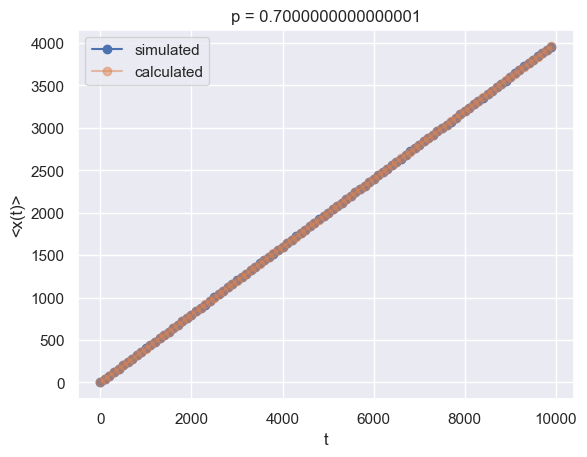

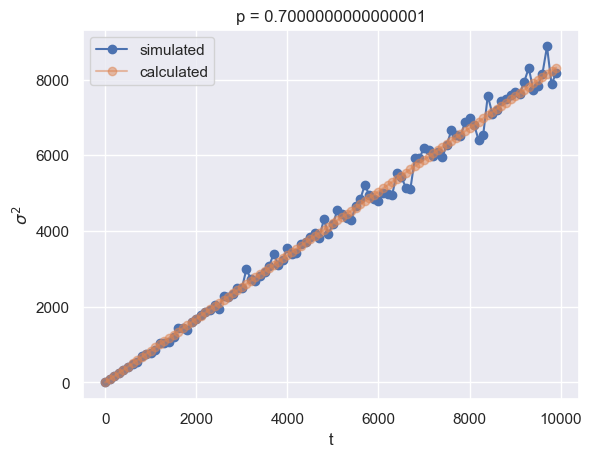

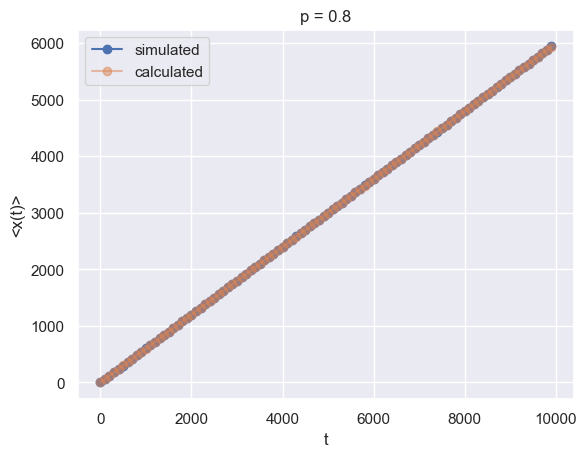

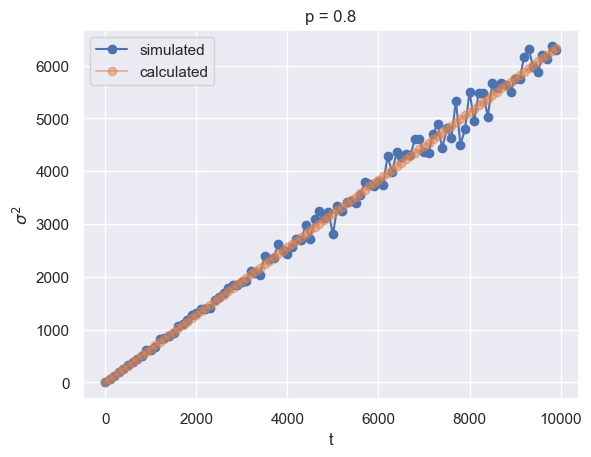

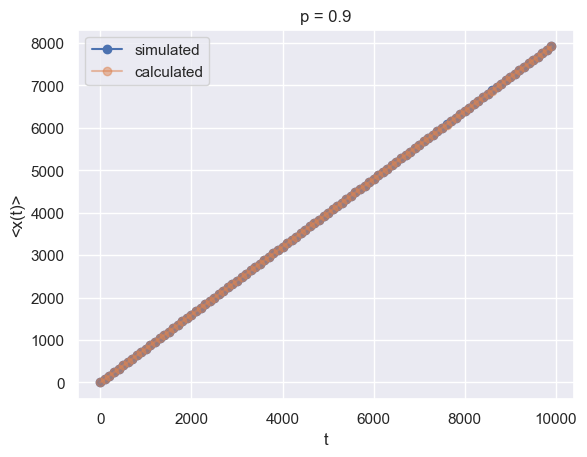

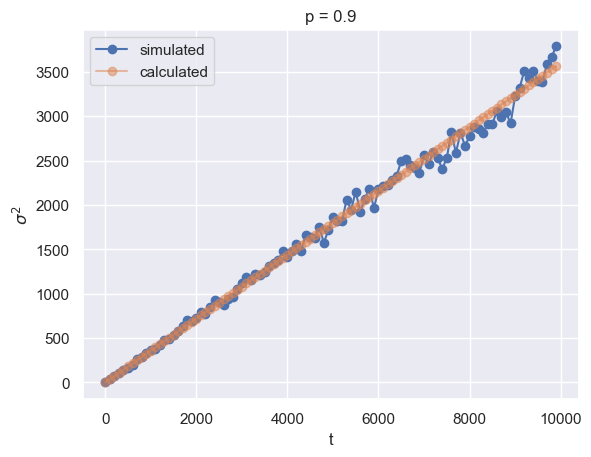

In [34]:
more_calculations(t_max=10000, p_list=np.linspace(0.1, 0.9, 9), number_of_tests=1000)

In [11]:
# and that's it...

In [12]:
# for more information about boxed_print function please see its docstring

Modules.boxed_print?

Signature: Modules.boxed_print(messages: list) -> None
Docstring:
Explanation:
    in this function we use css styles to print with beautiful styles.

Important Note:
    note that because of html and css styles this function just work in jupyter (web browser).

Parameters:
    messages:
        a list of messages to print each message in a single line.
File:      c:\users\alire\documents\10th_semester\computer_simulation_in_physics\hws\5\4.2\modules\modules.py
Type:      function


In [13]:
# and its source code is:

Modules.boxed_print??

Signature: Modules.boxed_print(messages: list) -> None
Source:   
def boxed_print(messages: list) -> None:
    '''
        Explanation:
            in this function we use css styles to print with beautiful styles.
        
        Important Note:
            note that because of html and css styles this function just work in jupyter (web browser).
        
        Parameters:
            messages:
                a list of messages to print each message in a single line.
    '''
    
    # css styles
    styles = '''
                <style>
                    .box {
                        padding: 5px 10px;
                        border: 1px solid black;
                    }
                    
                    .error {
                        color: green;
                    }
                </style>         
    '''
    
    # html content
    content = "<div class='box'>"
    
    for message in messages:
        if "Error" in message:
            content += f"<span class